**Introduction to Artificial Intelligence and Machine learning, IAI600**

**LAB 5 :**
*Building an SVM Classifier for MNIST with Hyperparameter Tuning and Comparative Analysis*

*Gabriel Garreau :*
*gabriel.garreau@student.hv.se*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear SVM Classification

The next few code cells generate the first figures in chapter 5. The first actual code sample comes after.

**Code to generate Figure 5–1. Large margin classification**

In [8]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1.7976931348623157e+308)
svm_clf.fit(X, y)

SVC(C=1.7976931348623157e+308, kernel='linear')

Saving figure large_margin_classification_plot


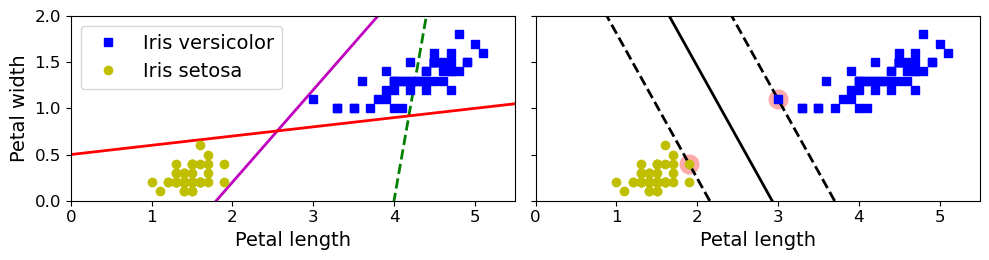

In [9]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

**Code to generate Figure 5–2. Sensitivity to feature scales**

Saving figure sensitivity_to_feature_scales_plot


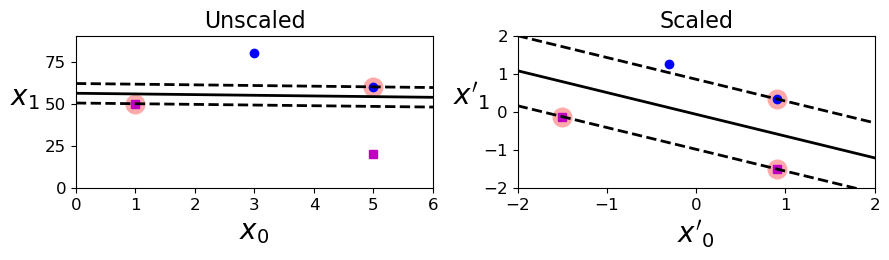

In [11]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


## Soft Margin Classification
**Code to generate Figure 5–3. Hard margin sensitivity to outliers**

Saving figure sensitivity_to_outliers_plot


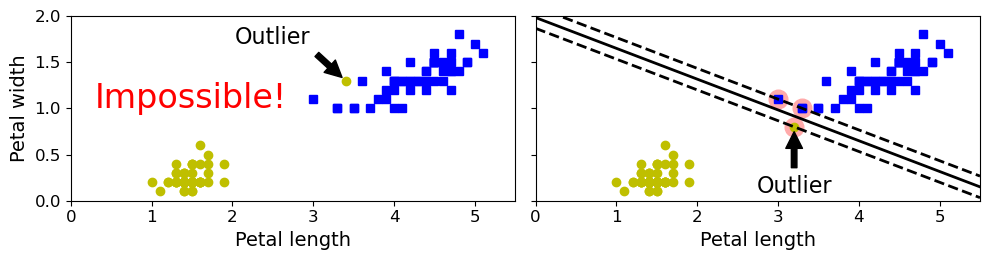

In [13]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

**This is the first code example in chapter 5:**

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [16]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**Code to generate Figure 5–4. Large margin versus fewer margin violations**

In [18]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [19]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


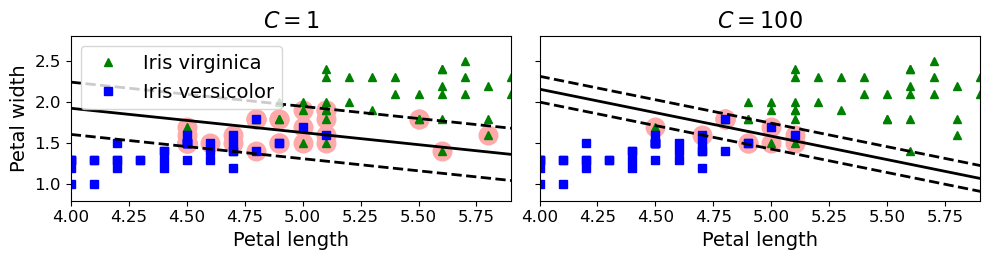

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# Nonlinear SVM Classification

**Code to generate Figure 5–5. Adding features to make a dataset linearly separable**

Saving figure higher_dimensions_plot


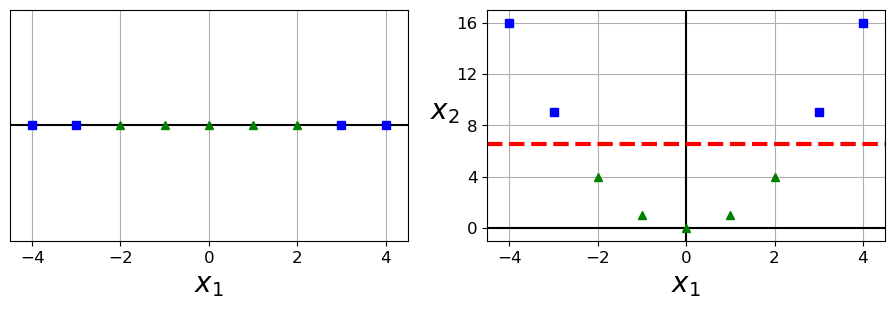

In [23]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

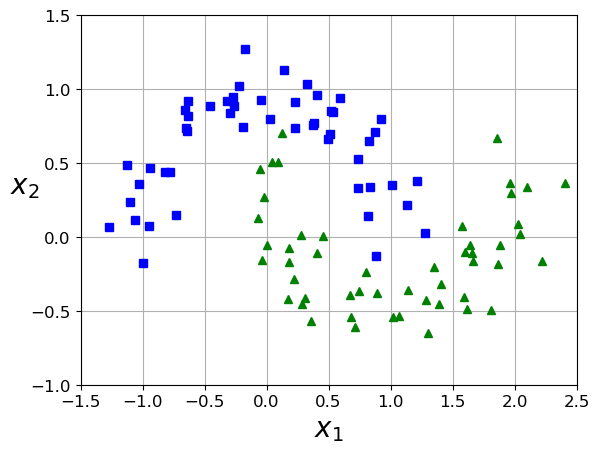

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**Here is second code example in the chapter:**

In [26]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

**Code to generate Figure 5–6. Linear SVM classifier using polynomial features**

Saving figure moons_polynomial_svc_plot


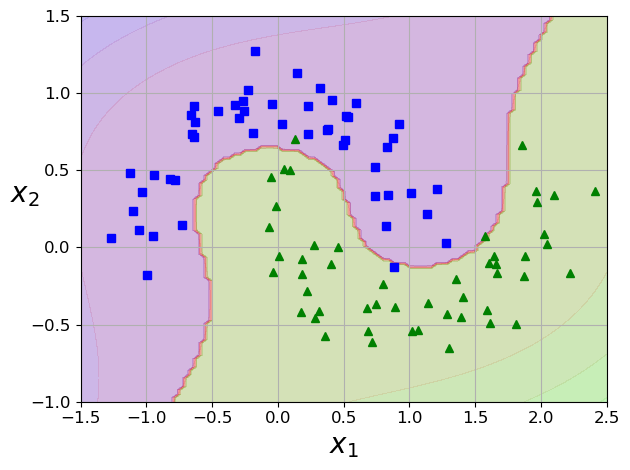

In [28]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

**Next code example:**

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

**Code to generate Figure 5–7. SVM classifiers with a polynomial kernel**

In [33]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


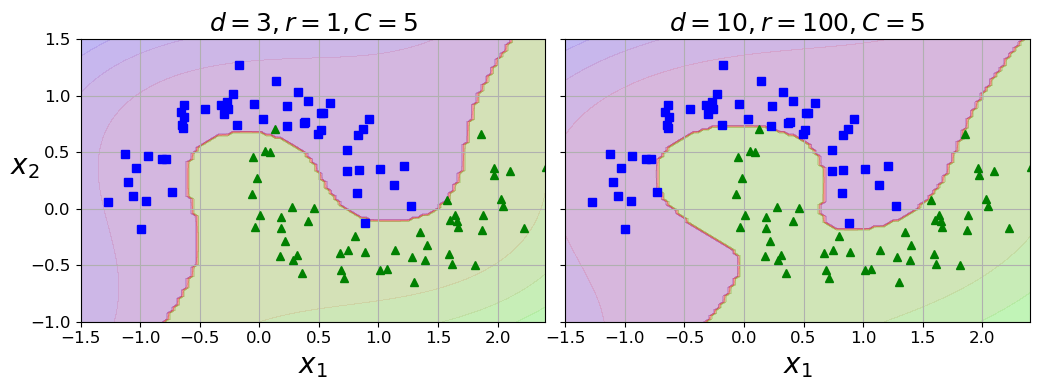

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Similarity Features

**Code to generate Figure 5–8. Similarity features using the Gaussian RBF**

Saving figure kernel_method_plot


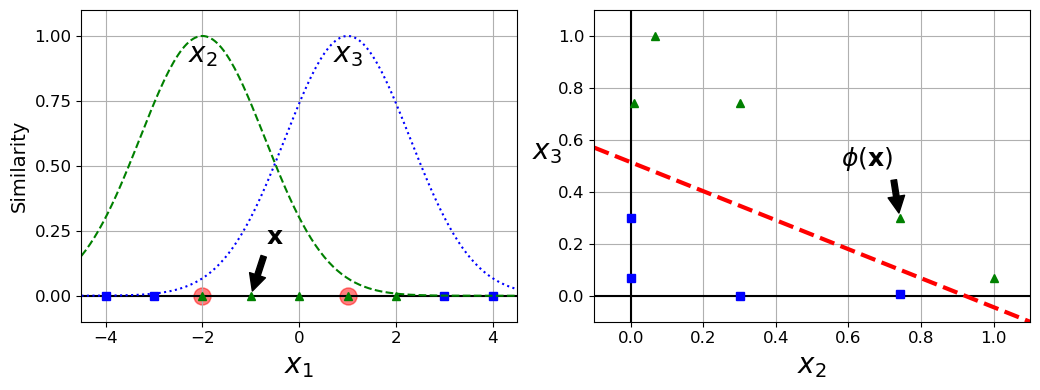

In [37]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

In [38]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


## Gaussian RBF Kernel

**Next code example:**

In [41]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

**Code to generate Figure 5–9. SVM classifiers using an RBF kernel**

Saving figure moons_rbf_svc_plot


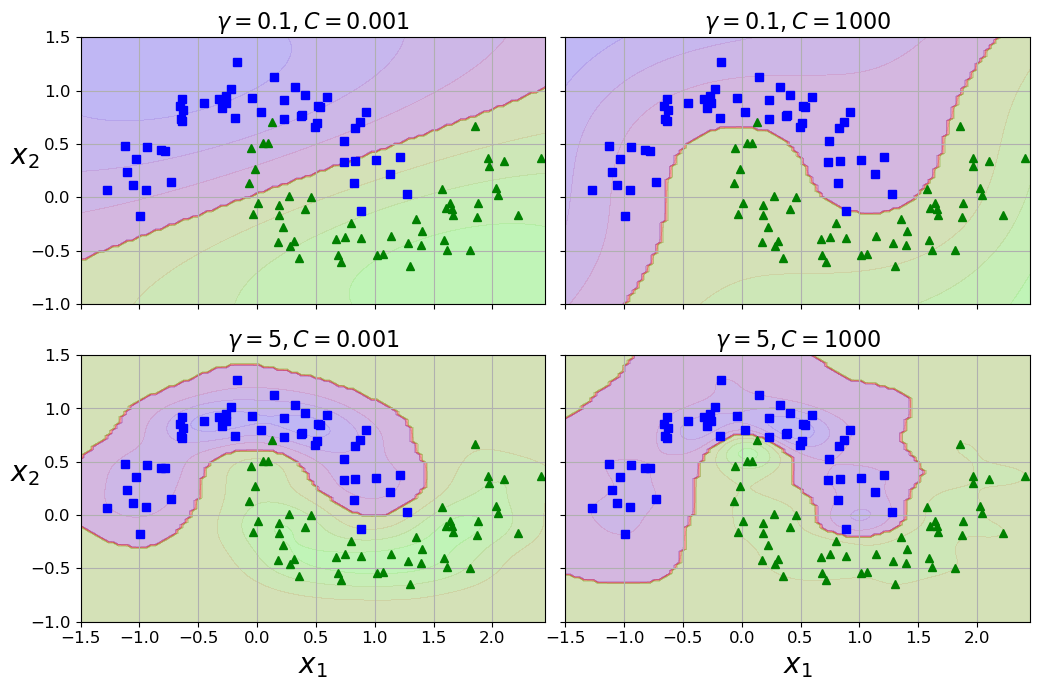

In [43]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

# SVM Regression

In [45]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

**Next code example:**

In [47]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5, random_state=42)

**Code to generate Figure 5–10. SVM Regression**

In [49]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Saving figure svm_regression_plot


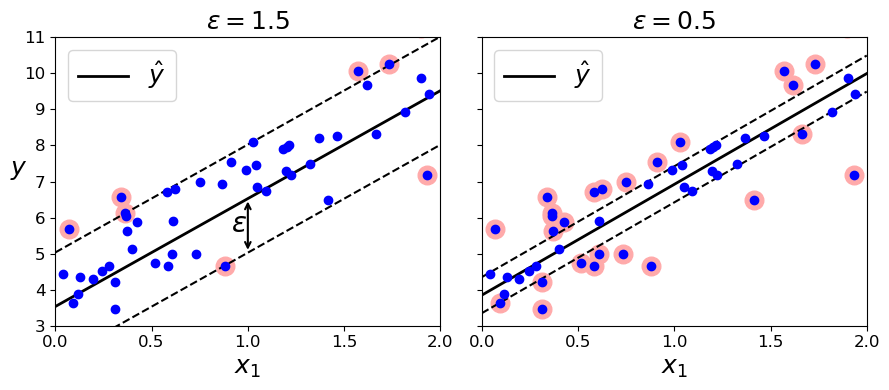

In [50]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

In [51]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

**Note**: to be future-proof, we set `gamma="scale"`, as this will be the default value in Scikit-Learn 0.22.

**Next code example:**

In [54]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

**Code to generate Figure 5–11. SVM Regression using a second-degree polynomial kernel**

In [56]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


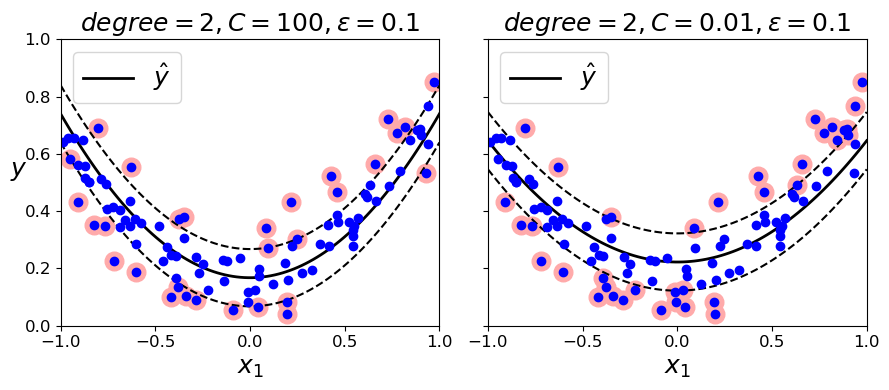

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

# SVM Classifier on MNIST dataset

_Exercise: train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?_

First, let's load the dataset and split it into a training set and a test set. We could use `train_test_split()` but people usually just take the first 60,000 instances for the training set, and the last 10,000 instances for the test set (this makes it possible to compare your model's performance with others): 

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this, we use `as_frame=False`.

In [62]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

## SVM Classifier with Linear Kernel

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

**Warning**: this may take a few minutes depending on your hardware.

In [65]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

In [67]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

Okay, 83.5% accuracy on MNIST is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

**Warning**: this may take a few minutes depending on your hardware.

In [71]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [72]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

That's much better (we cut the error rate by about 53%), but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an `SVC` with an RBF kernel (the default).

### SVM Classifier with Linear Kernel on test_set

In [75]:
y_pred0 = lin_clf.predict(X_test_scaled)

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score
labels_svm = svm_clf.classes_

svm_lin_accuracy = accuracy_score(y_test, y_pred0)
svm_lin_precision = precision_score(y_test, y_pred0, labels=labels_svm, average='micro')
svm_lin_recall = recall_score(y_test, y_pred0, labels=labels_svm, average='micro')
svm_lin_f1 = f1_score(y_test, y_pred0, labels=labels_svm, average='micro')
#svm_lin_param = lin_clf.get_params(False)

print('svm_lin_accuracy  = ', svm_lin_accuracy)
print('svm_lin_precision = ', svm_lin_precision)
print('svm_lin_recall    = ', svm_lin_recall)
print('svm_lin_f1        = ', svm_lin_f1)
#print('svm_lin_param     = ', svm_lin_param)

svm_lin_accuracy  =  0.9121
svm_lin_precision =  0.9437842778793418
svm_lin_recall    =  0.9763593380614657
svm_lin_f1        =  0.959795491517546


## SVM Classifier with RBF Kernel

### Search for the best hyperparameters

**Note**: to be future-proof we set `gamma="scale"` since it will be the default value in Scikit-Learn 0.22.

In [80]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [81]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data. Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.01), "C": uniform(2, 6)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=5.461423307758155, gamma=0.0031082625355111568; total time=   0.2s
[CV] END ...C=5.461423307758155, gamma=0.0031082625355111568; total time=   0.1s
[CV] END ...C=5.461423307758155, gamma=0.0031082625355111568; total time=   0.1s
[CV] END ...C=3.1714579267882668, gamma=0.005277790113535768; total time=   0.1s
[CV] END ...C=3.1714579267882668, gamma=0.005277790113535768; total time=   0.2s
[CV] END ...C=3.1714579267882668, gamma=0.005277790113535768; total time=   0.1s
[CV] END ...C=3.6846341746451348, gamma=0.001057586665558171; total time=   0.1s
[CV] END ...C=3.6846341746451348, gamma=0.001057586665558171; total time=   0.1s
[CV] END ...C=3.6846341746451348, gamma=0.001057586665558171; total time=   0.1s
[CV] END ...C=5.872833775443007, gamma=0.0015035250887624149; total time=   0.1s
[CV] END ...C=5.872833775443007, gamma=0.0015035250887624149; total time=   0.1s
[CV] END ...C=5.872833775443007, gamma=0.0015035

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022BB60CBB60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022BB60CB680>},
                   verbose=2)

In [84]:
rnd_search_cv.best_estimator_

SVC(C=5.872833775443007, gamma=0.0015035250887624149)

In [85]:
rnd_search_cv.best_score_

0.8619937302572033

This looks pretty low but remember we only trained the model on 1,000 instances. Let's retrain the best estimator on the whole training set:

**Warning**: the following cell may take hours to run, depending on your hardware.

In [88]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=5.872833775443007, gamma=0.0015035250887624149)

In [89]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9985833333333334

Ah, this looks good! Let's select this model. Now we can test it on the test set:

### Best SVM Classifier with RBF Kernel on test_set

In [92]:
y_pred1 = rnd_search_cv.best_estimator_.predict(X_test_scaled)

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score
labels_svm = svm_clf.classes_

svm_rbf_accuracy = accuracy_score(y_test, y_pred1)
svm_rbf_precision = precision_score(y_test, y_pred1, labels=labels_svm, average='micro')
svm_rbf_recall = recall_score(y_test, y_pred1, labels=labels_svm, average='micro')
svm_rbf_f1 = f1_score(y_test, y_pred1, labels=labels_svm, average='micro')
svm_rbf_para = rnd_search_cv.best_params_
print('svm_rbf_accuracy  = ', svm_rbf_accuracy)
print('svm_rbf_precision = ', svm_rbf_precision)
print('svm_rbf_recall    = ', svm_rbf_recall)
print('svm_rbf_f1        = ', svm_rbf_f1)
print('svm_rbf_para      = ', svm_rbf_para)

svm_rbf_accuracy  =  0.9725
svm_rbf_precision =  0.9725
svm_rbf_recall    =  0.9725
svm_rbf_f1        =  0.9725
svm_rbf_para      =  {'C': 5.872833775443007, 'gamma': 0.0015035250887624149}


Not too bad, but apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing `C` and/or `gamma`), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters `C=5` and `gamma=0.005` yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.

## SVM Classifier with Polynomial Kernel

### Search for the best hyperparameters

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [98]:
svm_clf2 = SVC(kernel='poly',gamma="scale",random_state=42)
svm_clf2.fit(X_train_scaled[:10000], y_train[:10000])

SVC(kernel='poly', random_state=42)

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions2 = {
    'C': np.linspace(100000, 1000000, 50),
    'degree': [4, 5, 6],
    'coef0': np.linspace(1, 7, 20)
}

rnd_search_cv2 = RandomizedSearchCV(svm_clf2, param_distributions2, n_iter=100, verbose=2, cv=3)
rnd_search_cv2.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=173469.38775510204, coef0=6.368421052631579, degree=4; total time=   0.0s
[CV] END C=173469.38775510204, coef0=6.368421052631579, degree=4; total time=   0.0s
[CV] END C=173469.38775510204, coef0=6.368421052631579, degree=4; total time=   0.0s
[CV] END C=320408.16326530615, coef0=2.5789473684210527, degree=5; total time=   0.0s
[CV] END C=320408.16326530615, coef0=2.5789473684210527, degree=5; total time=   0.0s
[CV] END C=320408.16326530615, coef0=2.5789473684210527, degree=5; total time=   0.0s
[CV] END ...........C=724489.7959183673, coef0=7.0, degree=5; total time=   0.0s
[CV] END ...........C=724489.7959183673, coef0=7.0, degree=5; total time=   0.0s
[CV] END ...........C=724489.7959183673, coef0=7.0, degree=5; total time=   0.0s
[CV] END C=228571.42857142858, coef0=2.263157894736842, degree=4; total time=   0.0s
[CV] END C=228571.42857142858, coef0=2.263157894736842, degree=4; total time=   0.0s
[CV] END C=

RandomizedSearchCV(cv=3, estimator=SVC(kernel='poly', random_state=42),
                   n_iter=100,
                   param_distributions={'C': array([ 100000.        ,  118367.34693878,  136734.69387755,
        155102.04081633,  173469.3877551 ,  191836.73469388,
        210204.08163265,  228571.42857143,  246938.7755102 ,
        265306.12244898,  283673.46938776,  302040.81632653,
        320408.16326531,  338775.51020408,  357142.85714286,
        375510.2...
        871428.57142857,  889795.91836735,  908163.26530612,
        926530.6122449 ,  944897.95918367,  963265.30612245,
        981632.65306122, 1000000.        ]),
                                        'coef0': array([1.        , 1.31578947, 1.63157895, 1.94736842, 2.26315789,
       2.57894737, 2.89473684, 3.21052632, 3.52631579, 3.84210526,
       4.15789474, 4.47368421, 4.78947368, 5.10526316, 5.42105263,
       5.73684211, 6.05263158, 6.36842105, 6.68421053, 7.        ]),
                                        'degree': [4, 5, 6]},
                   verbose=2)

In [100]:
rnd_search_cv2.best_estimator_

SVC(C=228571.42857142858, coef0=2.263157894736842, degree=4, kernel='poly',
    random_state=42)

In [101]:
rnd_search_cv2.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=228571.42857142858, coef0=2.263157894736842, degree=4, kernel='poly',
    random_state=42)

In [102]:
y_pred2 = rnd_search_cv2.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred2)

1.0

### Best SVM Classifier with Polynomial Kernel on test_set

In [104]:
y_pred22 = rnd_search_cv2.best_estimator_.predict(X_test_scaled)

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score
labels_svm = svm_clf.classes_

svm_poly_accuracy = accuracy_score(y_test, y_pred22)
svm_poly_precision = precision_score(y_test, y_pred22, labels=labels_svm, average='micro')
svm_poly_recall = recall_score(y_test, y_pred22, labels=labels_svm, average='micro')
svm_poly_f1 = f1_score(y_test, y_pred22, labels=labels_svm, average='micro')
svm_poly_para = rnd_search_cv2.best_params_
print('svm_poly_accuracy  = ', svm_poly_accuracy)
print('svm_poly_precision = ', svm_poly_precision)
print('svm_poly_recall    = ', svm_poly_recall)
print('svm_poly_f1        = ', svm_poly_f1)
print('svm_poly_para      = ', svm_poly_para)

svm_poly_accuracy  =  0.9755
svm_poly_precision =  0.9755
svm_poly_recall    =  0.9755
svm_poly_f1        =  0.9755
svm_poly_para      =  {'degree': 4, 'coef0': 2.263157894736842, 'C': 228571.42857142858}


## Comparison of Kernel from SVM Classifier on the 'test_set'

In [107]:
import pandas as pd

comp_tab = pd.DataFrame({
    'SVM Classifier': ['Linear', 'RBF', 'Polynomial'],
    'Accuracy (%)': [svm_lin_accuracy*100, svm_rbf_accuracy*100, svm_poly_accuracy*100],
    'Precision (%)':[svm_lin_precision*100, svm_rbf_precision*100, svm_poly_precision*100],
    'Recall (%)': [svm_lin_recall*100, svm_rbf_recall*100, svm_poly_recall*100],
    'F1 score (%)':[svm_lin_f1*100, svm_rbf_f1*100, svm_poly_f1*100],
    'Hyperparameters': ['NaN', svm_rbf_para, svm_poly_para]
    })
pd.set_option('display.max_colwidth',None)
comp_tab

,SVM Classifier,Accuracy (%),Precision (%),Recall (%),F1 score (%),Hyperparameters
0,Linear,91.21,94.378428,97.635934,95.979549,NaN
1,RBF,97.25,97.250000,97.250000,97.250000,"{'C': 5.872833775443007, 'gamma': 0.0015035250887624149}"
2,Polynomial,97.55,97.550000,97.550000,97.550000,"{'degree': 4, 'coef0': 2.263157894736842, 'C': 228571.42857142858}"


In [108]:
import pandas as pd

comp_tab = pd.DataFrame({
    'SVM Classifier': ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 score (%)', 'Hyperparameters'],
    'Linear'    : [svm_lin_accuracy  *100, svm_lin_precision  *100, svm_lin_recall  *100, svm_lin_f1  *100, 'NaN'],
    'RBF'       : [svm_rbf_accuracy  *100, svm_rbf_precision  *100, svm_rbf_recall  *100, svm_rbf_f1  *100, svm_rbf_para],
    'Polynomial': [svm_poly_accuracy *100, svm_poly_precision *100, svm_poly_recall *100, svm_poly_f1 *100, svm_poly_para]
    })
pd.set_option('display.max_colwidth',None)
comp_tab

,SVM Classifier,Linear,RBF,Polynomial
0,Accuracy (%),91.21,97.25,97.55
1,Precision (%),94.378428,97.25,97.55
2,Recall (%),97.635934,97.25,97.55
3,F1 score (%),95.979549,97.25,97.55
4,Hyperparameters,NaN,"{'C': 5.872833775443007, 'gamma': 0.0015035250887624149}","{'degree': 4, 'coef0': 2.263157894736842, 'C': 228571.42857142858}"
